In [1]:
import networkx as nx

# Trying out networkx

## ChatGPT example

In [2]:
# Create an empty graph
G = nx.Graph()

# Add nodes
G.add_node(1)
G.add_nodes_from([2, 3, 4])

# Add edges
G.add_edge(1, 2)
G.add_edges_from([(2, 3), (3, 4), (4, 1)])

print("Nodes:", G.nodes())
print("Edges:", G.edges())

Nodes: [1, 2, 3, 4]
Edges: [(1, 2), (1, 4), (2, 3), (3, 4)]


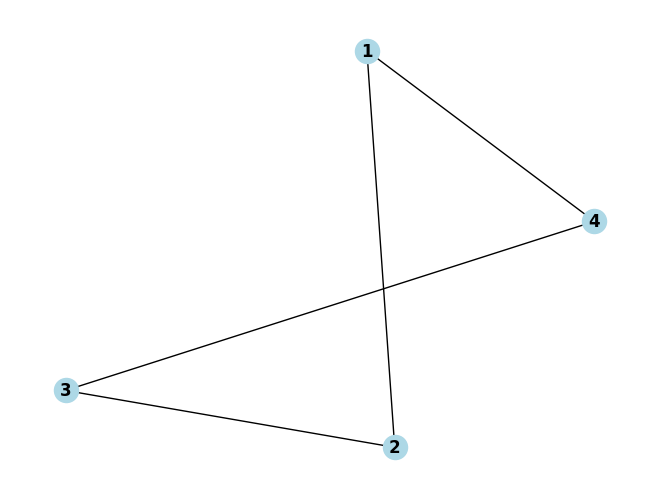

In [3]:
import matplotlib.pyplot as plt

nx.draw(G, with_labels=True, node_color="lightblue", font_weight="bold")
plt.show()


In [4]:
# Compute shortest path between nodes
shortest_path = nx.shortest_path(G, source=1, target=3)
print("Shortest path:", shortest_path)


Shortest path: [1, 2, 3]


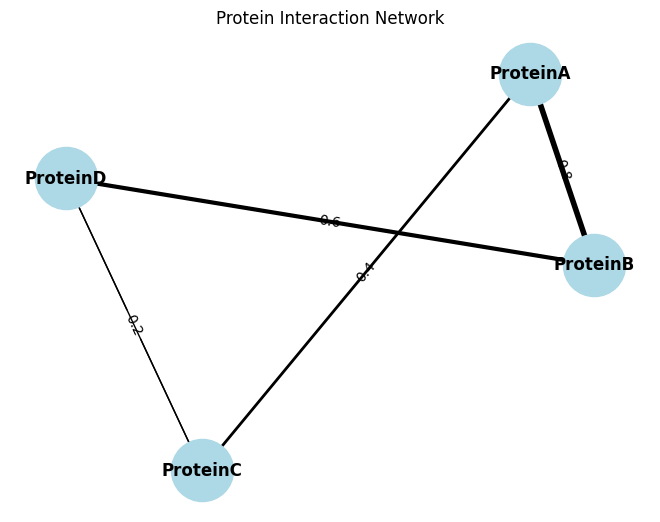

In [5]:
import networkx as nx
import matplotlib.pyplot as plt

# Define proteins and their interaction rates
proteins = ["ProteinA", "ProteinB", "ProteinC", "ProteinD"]
interactions = [
    ("ProteinA", "ProteinB", 0.8),  # High interaction
    ("ProteinA", "ProteinC", 0.4),  # Moderate interaction
    ("ProteinB", "ProteinD", 0.6),  # Moderate interaction
    ("ProteinC", "ProteinD", 0.2),  # Low interaction
]

# Create a weighted graph
G = nx.Graph()

# Add nodes (proteins)
G.add_nodes_from(proteins)

# Add weighted edges (interactions)
for u, v, weight in interactions:
    G.add_edge(u, v, weight=weight)

# Visualize the graph
pos = nx.spring_layout(G, seed=42)  # Layout for consistent positioning
edge_weights = nx.get_edge_attributes(G, "weight")

# Draw nodes and edges
nx.draw(G, pos, with_labels=True, node_color="lightblue", font_weight="bold", node_size=2000)
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_weights)
nx.draw_networkx_edges(G, pos, width=[weight * 5 for weight in edge_weights.values()])  # Scale edge thickness

plt.title("Protein Interaction Network")
plt.show()


# 1. Building DataFrame for analysis

## Load table

In [6]:
import pandas as pd
import numpy as np

RUN_PATH = "/media/floricslimani/SSD4To/SSD_floricslimani/Fish_seq/Davide/2024-09-03 - SeqFISH_Run8 - HeLa_POLR2"

PATH = RUN_PATH + "/result_tables"
coloc = pd.read_feather(PATH + "/Colocalisation.feather")
acquisition = pd.read_feather(PATH + "/Acquisition.feather")
detection = pd.read_feather(PATH + "/Detection.feather")
detection['color_id'] = detection['color_id'].astype(int)
gene1_key = "Gene1 (Ch1 - Cy3 - CAM_1)"
gene2_key = "Beads (Ch2 - Green - CAM_2)"
acquisition

,acquisition_id,location,cycle,full_path,fish_shape,fish_map,dapi_full_path,dapi_shape,dapi_map,fish_reodered_shape,Cycle n.,Gene1 (Ch1 - Cy3 - CAM_1),Beads (Ch2 - Green - CAM_2),Barcode 1,Threshold_0
0,0,Location-01,0,/media/floricslimani/SSD4To/SSD_floricslimani/...,"[51, 2, 2004, 2004]","{'c': 2, 'cycles': 0, 'x': 4, 'y': 3, 'z': 1}",/media/floricslimani/SSD4To/SSD_floricslimani/...,"[51, 2, 2004, 2004]","{'c': 1, 'x': 3, 'y': 2, 'z': 0}","[51, 2004, 2004, 2]",0,POLR2A,Beads,22,525
1,1,Location-02,0,/media/floricslimani/SSD4To/SSD_floricslimani/...,"[51, 2, 2004, 2004]","{'c': 2, 'cycles': 0, 'x': 4, 'y': 3, 'z': 1}",/media/floricslimani/SSD4To/SSD_floricslimani/...,"[51, 2, 2004, 2004]","{'c': 1, 'x': 3, 'y': 2, 'z': 0}","[51, 2004, 2004, 2]",0,POLR2A,Beads,22,525
2,2,Location-03,0,/media/floricslimani/SSD4To/SSD_floricslimani/...,"[51, 2, 2004, 2004]","{'c': 2, 'cycles': 0, 'x': 4, 'y': 3, 'z': 1}",/media/floricslimani/SSD4To/SSD_floricslimani/...,"[51, 2, 2004, 2004]","{'c': 1, 'x': 3, 'y': 2, 'z': 0}","[51, 2004, 2004, 2]",0,POLR2A,Beads,22,525
3,3,Location-04,0,/media/floricslimani/SSD4To/SSD_floricslimani/...,"[51, 2, 2004, 2004]","{'c': 2, 'cycles': 0, 'x': 4, 'y': 3, 'z': 1}",/media/floricslimani/SSD4To/SSD_floricslimani/...,"[51, 2, 2004, 2004]","{'c': 1, 'x': 3, 'y': 2, 'z': 0}","[51, 2004, 2004, 2]",0,POLR2A,Beads,22,525
4,4,Location-05,0,/media/floricslimani/SSD4To/SSD_floricslimani/...,"[56, 2, 2004, 2004]","{'c': 2, 'cycles': 0, 'x': 4, 'y': 3, 'z': 1}",/media/floricslimani/SSD4To/SSD_floricslimani/...,"[51, 2, 2004, 2004]","{'c': 1, 'x': 3, 'y': 2, 'z': 0}","[56, 2004, 2004, 2]",0,POLR2A,Beads,22,525
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
205,205,Location-06,20,None,"[51, 2, 2004, 2004]","{'c': 2, 'cycles': 0, 'x': 4, 'y': 3, 'z': 1}",/media/floricslimani/SSD4To/SSD_floricslimani/...,"[51, 2, 2004, 2004]","{'c': 1, 'x': 3, 'y': 2, 'z': 0}","[51, 2004, 2004, 2]",20,Washout,Beads,45,350
206,206,Location-07,20,None,"[56, 2, 2004, 2004]","{'c': 2, 'cycles': 0, 'x': 4, 'y': 3, 'z': 1}",/media/floricslimani/SSD4To/SSD_floricslimani/...,"[51, 2, 2004, 2004]","{'c': 1, 'x': 3, 'y': 2, 'z': 0}","[56, 2004, 2004, 2]",20,Washout,Beads,45,350
207,207,Location-08,20,None,"[51, 2, 2004, 2004]","{'c': 2, 'cycles': 0, 'x': 4, 'y': 3, 'z': 1}",/media/floricslimani/SSD4To/SSD_floricslimani/...,"[51, 2, 2004, 2004]","{'c': 1, 'x': 3, 'y': 2, 'z': 0}","[51, 2004, 2004, 2]",20,Washout,Beads,45,350
208,208,Location-09,20,None,"[56, 2, 2004, 2004]","{'c': 2, 'cycles': 0, 'x': 4, 'y': 3, 'z': 1}",/media/floricslimani/SSD4To/SSD_floricslimani/...,"[51, 2, 2004, 2004]","{'c': 1, 'x': 3, 'y': 2, 'z': 0}","[56, 2004, 2004, 2]",20,Washout,Beads,45,350


## Merging names in Detection

In [7]:
rna_names = acquisition.melt(
    id_vars='acquisition_id',
    value_vars=[gene1_key],
    value_name="RNA",
    var_name="color_id"
    )
rna_names['color_id'] = rna_names['color_id'].replace({
    gene2_key : 1,
    gene1_key : 0,

}).astype(int)
rna_names

,acquisition_id,color_id,RNA
0,0,0,POLR2A
1,1,0,POLR2A
2,2,0,POLR2A
3,3,0,POLR2A
4,4,0,POLR2A
...,...,...,...
205,205,0,Washout
206,206,0,Washout
207,207,0,Washout
208,208,0,Washout


In [8]:
if 'RNA' not in detection.columns : 
    detection = pd.merge(
        detection,
        rna_names,
        on= ['acquisition_id', 'color_id'],
        validate= 'm:1',
    )
detection

,detection_id,acquisition_id,visual_name,filename,voxel_size,spot_size,alpha,beta,gamma,artifact_radius,cluster_size,min_spot_per_cluster,Threshold_0,threshold,color_id,image_path,image_key,location,RNA
0,1,0,/media/floricslimani/SSD4To/SSD_floricslimani/...,/media/floricslimani/SSD4To/SSD_floricslimani/...,"[200, 97, 97]","[200, 100, 100]",0.5,1,3,1400,400,4,525,525,0,/media/floricslimani/SSD4To/SSD_floricslimani/...,1,Location-01,POLR2A
1,2,10,/media/floricslimani/SSD4To/SSD_floricslimani/...,/media/floricslimani/SSD4To/SSD_floricslimani/...,"[200, 97, 97]","[200, 100, 100]",0.5,1,3,1400,400,4,865,865,0,/media/floricslimani/SSD4To/SSD_floricslimani/...,2,Location-01,Washout
2,3,20,/media/floricslimani/SSD4To/SSD_floricslimani/...,/media/floricslimani/SSD4To/SSD_floricslimani/...,"[200, 97, 97]","[200, 100, 100]",0.5,1,3,1400,400,4,865,865,0,/media/floricslimani/SSD4To/SSD_floricslimani/...,3,Location-01,POLR2B
3,4,30,/media/floricslimani/SSD4To/SSD_floricslimani/...,/media/floricslimani/SSD4To/SSD_floricslimani/...,"[200, 97, 97]","[200, 100, 100]",0.5,1,3,1400,400,4,1300,1300,0,/media/floricslimani/SSD4To/SSD_floricslimani/...,4,Location-01,Washout
4,5,40,/media/floricslimani/SSD4To/SSD_floricslimani/...,/media/floricslimani/SSD4To/SSD_floricslimani/...,"[200, 97, 97]","[200, 100, 100]",0.5,1,3,1400,400,4,1300,1300,0,/media/floricslimani/SSD4To/SSD_floricslimani/...,5,Location-01,POLR2C
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
205,206,169,/media/floricslimani/SSD4To/SSD_floricslimani/...,/media/floricslimani/SSD4To/SSD_floricslimani/...,"[200, 97, 97]","[200, 100, 100]",0.5,1,3,1400,400,4,480,480,0,/media/floricslimani/SSD4To/SSD_floricslimani/...,206,Location-10,POLR2K
206,207,179,/media/floricslimani/SSD4To/SSD_floricslimani/...,/media/floricslimani/SSD4To/SSD_floricslimani/...,"[200, 97, 97]","[200, 100, 100]",0.5,1,3,1400,400,4,350,350,0,/media/floricslimani/SSD4To/SSD_floricslimani/...,207,Location-10,Washout
207,208,189,/media/floricslimani/SSD4To/SSD_floricslimani/...,/media/floricslimani/SSD4To/SSD_floricslimani/...,"[200, 97, 97]","[200, 100, 100]",0.5,1,3,1400,400,4,350,350,0,/media/floricslimani/SSD4To/SSD_floricslimani/...,208,Location-10,POLR2L
208,209,199,/media/floricslimani/SSD4To/SSD_floricslimani/...,/media/floricslimani/SSD4To/SSD_floricslimani/...,"[200, 97, 97]","[200, 100, 100]",0.5,1,3,1400,400,4,350,350,0,/media/floricslimani/SSD4To/SSD_floricslimani/...,209,Location-10,Washout


In [9]:
if 'RNA1' not in coloc :
    coloc = pd.merge(
        coloc,
        detection.loc[:,['detection_id','RNA']].rename(columns={'RNA' : 'RNA1'}),
        left_on= 'detection_id1',
        right_on= 'detection_id',
        validate='m:1'
    )
if 'RNA2' not in coloc :
    coloc = pd.merge(
        coloc,
        detection.loc[:,['detection_id','RNA']].rename(columns={'RNA' : 'RNA2'}),
        left_on= 'detection_id2',
        right_on= 'detection_id',
        validate='m:1',
    )
if 'detection_id' in coloc.columns : coloc = coloc.drop('detection_id', axis=1)
if 'detection_id_x' in coloc.columns : coloc = coloc.drop('detection_id_x', axis=1)
if 'detection_id_y' in coloc.columns : coloc = coloc.drop('detection_id_y', axis=1)
coloc

/tmp/ipykernel_86403/4253874863.py:10: FutureWarning: Passing 'suffixes' which cause duplicate columns {'detection_id_x'} in the result is deprecated and will raise a MergeError in a future version.
  coloc = pd.merge(


,colocalisation_id,count,count_random_distribution,normalised_count,detection_id1,detection_id2,population1,population2,label,spot1_number,spot2_number,location,spot1_total_number,spot2_total_number,fraction,sub_fraction,RNA1,RNA2
0,0,173.0,1.0,173.0,1,1,all,all,5,173,173,Location-01,173,173,1.000000,1.000000,POLR2A,POLR2A
1,1,123.0,1.0,123.0,1,1,free,all,5,123,173,Location-01,173,173,0.710983,1.000000,POLR2A,POLR2A
2,2,50.0,1.0,50.0,1,1,clustered,all,5,50,173,Location-01,173,173,0.289017,1.000000,POLR2A,POLR2A
3,3,124.0,1.0,124.0,1,1,all,free,5,173,123,Location-01,173,173,0.716763,0.716763,POLR2A,POLR2A
4,4,123.0,1.0,123.0,1,1,free,free,5,123,123,Location-01,173,173,0.710983,1.000000,POLR2A,POLR2A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1258168,1258168,NaN,NaN,NaN,210,210,free,free,40,0,0,Location-10,0,0,NaN,NaN,Washout,Washout
1258169,1258169,NaN,NaN,NaN,210,210,clustered,free,40,0,0,Location-10,0,0,NaN,NaN,Washout,Washout
1258170,1258170,NaN,NaN,NaN,210,210,all,clustered,40,0,0,Location-10,0,0,NaN,NaN,Washout,Washout
1258171,1258171,NaN,NaN,NaN,210,210,free,clustered,40,0,0,Location-10,0,0,NaN,NaN,Washout,Washout


## Computing average interaction rate (**colocalization percentage**)

Interaction rate is taken as colocalization rate from 0 to 1 convert to percentage (x100)

In [10]:
def create_interaction_df(
        coloc : pd.DataFrame,
        population1 : str,
        population2 : str,
        washout_keyword = "Washout"
) :
    df = coloc.loc[(coloc['population1'] ==population1) & (coloc['population2'] == population2)]
    df = df.groupby(['RNA1', 'RNA2']).agg({
        "sub_fraction" : "mean",
        "fraction" : "mean",
        "normalised_count" : "mean",
        "spot1_number" : "sum",
    })

    for key in ['sub_fraction', 'fraction'] :
        df[key] *= 100
        df[key] = df[key].round().astype(int)
    
    df = df.reset_index(drop=False).rename(columns={
        'sub_fraction' : 'colocalisation',
        'fraction' : 'global_population_colocalisation',
        'normalised_count' : 'normalised_colocalisation_count',
        'spot1_number' : 'total_spot_number'
        })
    
    df = df.loc[(df['RNA1'] != washout_keyword) & (df['RNA2'] != washout_keyword)]
    df = df.loc[(df['RNA1'] != df['RNA2'])]

    return df

In [11]:
global_interactions = create_interaction_df(
    coloc,
    population1="all",
    population2="all",
)
all_to_clustered_interactions = create_interaction_df(
    coloc,
    population1="clustered",
    population2="all"
)

RNAs = pd.unique(
    pd.concat([global_interactions['RNA1'], global_interactions['RNA2']])
)


global_interactions.sort_values(['normalised_colocalisation_count', 'colocalisation'], ascending=False)

,RNA1,RNA2,colocalisation,global_population_colocalisation,normalised_colocalisation_count,total_spot_number
104,POLR2L,POLR2H,7,7,14.228421,27868
59,POLR2H,POLR2F,9,9,13.529828,25587
49,POLR2F,POLR2H,5,5,12.510257,68460
64,POLR2H,POLR2L,8,8,12.416088,25587
105,POLR2L,POLR2I,4,4,11.771097,27868
...,...,...,...,...,...,...
17,POLR2B,POLR2I,0,0,0.369085,26849
89,POLR2K,POLR2B,1,1,0.353896,8653
28,POLR2C,POLR2I,0,0,0.329653,21355
30,POLR2C,POLR2K,0,0,0.321767,21355


In [12]:

all_to_clustered_interactions.sort_values(['normalised_colocalisation_count', 'colocalisation'], ascending=False)
all_to_clustered_interactions

,RNA1,RNA2,colocalisation,global_population_colocalisation,normalised_colocalisation_count,total_spot_number
1,POLR2A,POLR2B,2,0,0.777966,9907
2,POLR2A,POLR2C,1,0,0.301695,9907
3,POLR2A,POLR2E,2,0,0.758757,9907
4,POLR2A,POLR2F,2,0,0.628814,9907
5,POLR2A,POLR2H,0,0,0.171751,9907
...,...,...,...,...,...,...
103,POLR2L,POLR2F,39,5,15.141026,1420
104,POLR2L,POLR2H,49,6,19.465812,1420
105,POLR2L,POLR2I,42,5,16.474359,1420
106,POLR2L,POLR2J,36,5,14.897436,1420


### coloc data visualisation

In [13]:
from pbwrap.plot.utils import get_colors_list
from adjustText import adjust_text

In [14]:
def scatter_plot_coloc_vs_norm_count(df : pd.DataFrame) :
    plt.figure(figsize=(10,10))
    labels = list(zip(df['RNA1'],df['RNA2']))
    color_list = get_colors_list(len(df['RNA1'].unique()))


    X = list(df['normalised_colocalisation_count'])
    Y = list(df['colocalisation'])
    plt.scatter(X, Y)
    annotations = zip(X,Y,labels)
    texts = [plt.text(*annotation) for annotation in annotations]
    adjust_text(texts, arrowprops=dict(arrowstyle="->", color='gray'))

    plt.xlabel('Normalised colocalisation count ()')
    plt.ylabel('colocalisation event (%)')

    plt.show()  

15 [ 0.49571213 -0.00342148]
17 [-0.14190588  0.78216049]
13 [ 0.19494282 -0.99672291]
64 [-0.9548313  -0.91098003]
17 [ 0.44006259 -0.64346706]
55 [0.39444149 0.09236285]


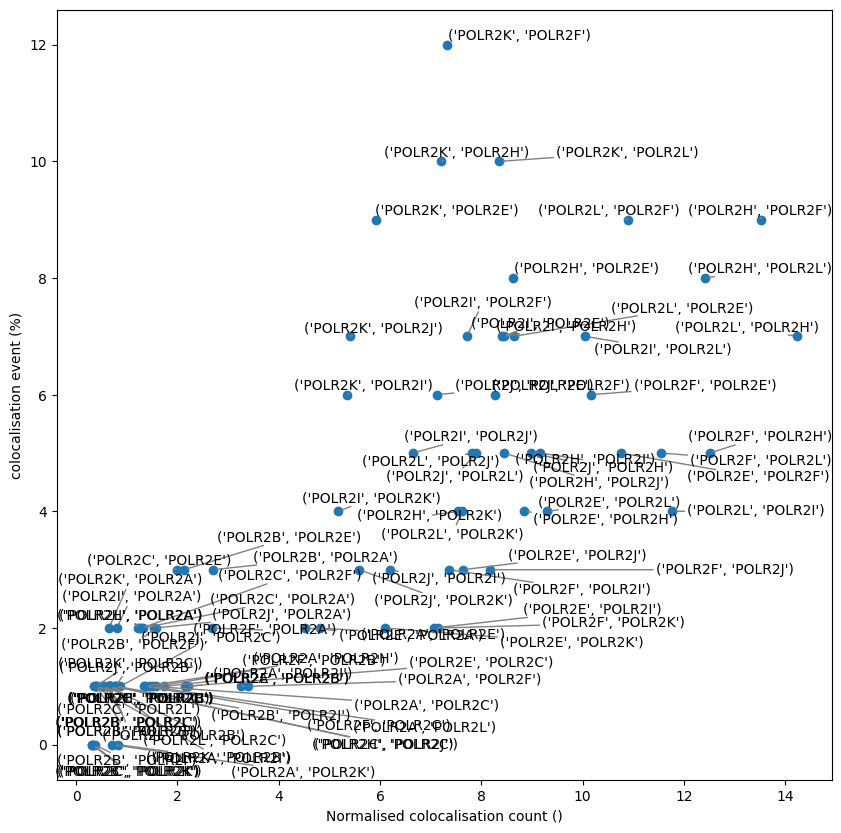

In [15]:
scatter_plot_coloc_vs_norm_count(global_interactions)

23 [-0.79296353  0.29384362]
24 [-0.44775209  0.86420712]
3 [-0.31382232  0.94363909]
64 [0.51358596 0.41855959]
5 [-0.66154462  0.76076256]
7 [0.25135205 0.23236431]
5 [ 0.67096332 -0.58121466]
7 [0.48949281 0.71482805]
5 [ 0.17283222 -0.11995936]
7 [ 0.48380122 -0.04102352]
5 [0.93888228 0.50872613]
7 [0.30154752 0.25513093]
5 [0.54024966 0.83649167]
7 [-0.01019466 -0.00401725]
5 [ 0.35681177 -0.11290049]
7 [ 0.51866062 -0.02074212]
5 [ 0.18498117 -0.09335802]
7 [ 0.58080429 -0.66724043]
5 [-0.10149447  0.25576199]
7 [ 0.42474767 -0.63125256]
5 [-0.73572724 -0.54121101]
7 [-0.68119734  0.69175029]
5 [-0.06308271 -0.70366613]
7 [-0.80144217 -0.63753688]


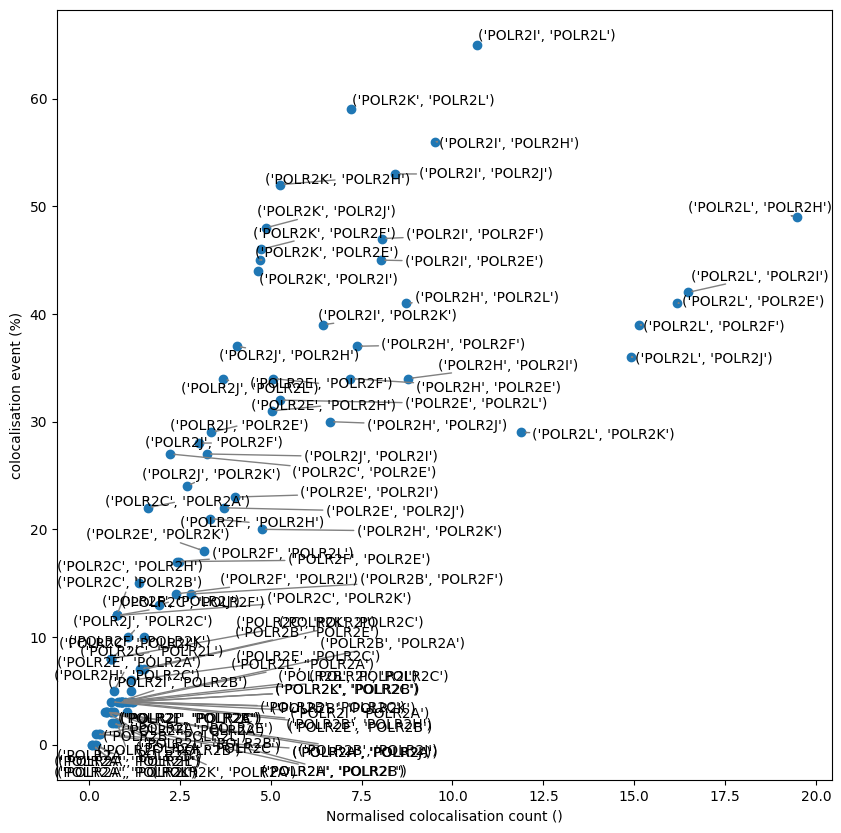

In [16]:
scatter_plot_coloc_vs_norm_count(all_to_clustered_interactions)


These are very basic graph where it is difficult to undersant much due to the density of information. Let's try to use graph theory approaches.

## Creating networkx undirected graph

## Testing directed multi-graph

In [17]:
interaction_graph = nx.MultiDiGraph()
data = list(all_to_clustered_interactions.loc[:,['RNA1','RNA2','colocalisation']].itertuples(index=False, name=None))
interaction_graph.add_weighted_edges_from(data)

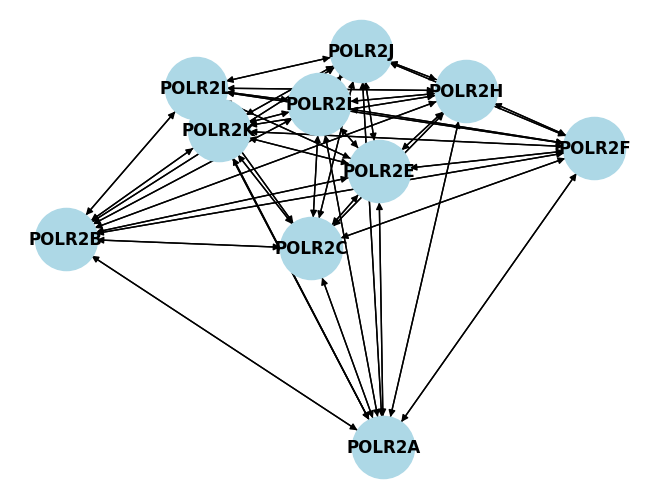

In [18]:
# pos = nx.spring_layout(interaction_graph, k=3)  # Layout for consistent positioning
nx.draw(interaction_graph, with_labels=True, node_color="lightblue", font_weight="bold", node_size=2000)

# 2. Clique/Comunities analysis


## Multi-directed graph

To use the full scope of the data (2 colocalization rate per RNA pair) we can use Multi-Directed graph and community theory

### Louvain algorithm

Tries to maximise modularity in comunities, which will never leave weakly connected node alone.

In [19]:
l_communities = nx.community.louvain_communities(interaction_graph)
print(l_communities)
print(type(l_communities))
print(type(l_communities[0]))

[{'POLR2A', 'POLR2B', 'POLR2C'}, {'POLR2H', 'POLR2E', 'POLR2I', 'POLR2J', 'POLR2F', 'POLR2L', 'POLR2K'}]
<class 'list'>
<class 'set'>


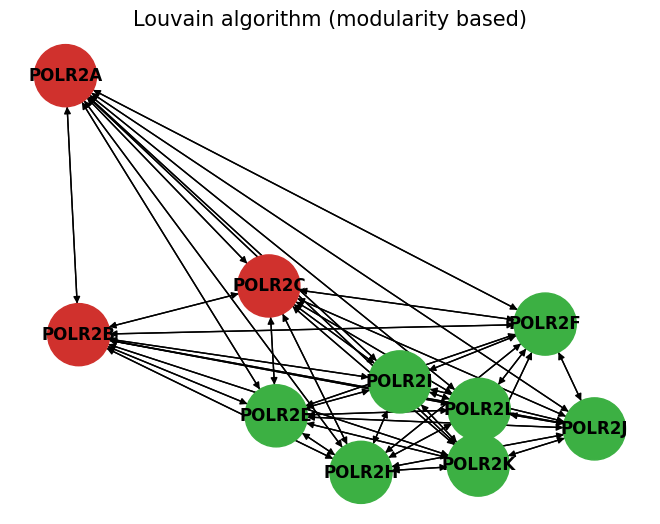

In [20]:
from pbwrap.plot.utils import get_colors_list
color_list = get_colors_list(len(l_communities))

for comunity, color in zip(l_communities, color_list) :
    for node in comunity :
        interaction_graph.nodes[node]['color'] = color

color_list = [data[1] for data in interaction_graph.nodes(data='color')]
nx.draw(interaction_graph, node_color = color_list, with_labels=True,font_weight="bold", node_size=2000)
plt.title("Louvain algorithm (modularity based)", fontdict={"size" : 15})
plt.show()

The green community looks relevant, but is the red community a real community or an artifact of construction due to modularity maximum ? It seems as expected that Louvain algorithm **doesn't allow for singleton**.

### Girvan–Newman algorithm

Wikipedia : 
The Girvan–Newman algorithm detects communities by progressively removing edges from the original network. The connected components of the remaining network are the **communities**. Instead of trying to construct a measure that tells us which edges are the most central to communities, the Girvan–Newman algorithm focuses on edges that are most likely "between" communities.

**Vertex betweenness** is an indicator of highly central nodes in networks. For any node i, vertex betweenness is defined as the fraction of shortest paths between pairs of nodes that run through it. It is relevant to models where the network modulates transfer of goods between known start and end points, under the assumption that such transfer seeks the shortest available route. 


--> *Lets try to find an optimal number of clique, allowing for singleton.*

In [21]:
interaction_graph = nx.MultiDiGraph()
data = list(all_to_clustered_interactions.loc[:,['RNA1','RNA2','colocalisation']].itertuples(index=False, name=None))
interaction_graph.add_weighted_edges_from(data)

In [22]:
iteration_number = 10

com = nx.community.girvan_newman(interaction_graph)
modularities = []
communities_memory = []
for iteration in range(iteration_number) :
    try :
        communities = next(com)
        communities_memory.append(communities)
        print(f"Iteration : {iteration + 1}")
        print(f"number of clique : {len(communities)}")
        print(communities)
        modularity = nx.community.modularity(interaction_graph, communities)
        modularities.append(modularity)
        print(f"partitionning modularity : {modularity}")
        print()
    except StopIteration :
        break

Iteration : 1
number of clique : 2
({'POLR2A'}, {'POLR2H', 'POLR2E', 'POLR2L', 'POLR2B', 'POLR2K', 'POLR2C', 'POLR2I', 'POLR2J', 'POLR2F'})
partitionning modularity : -0.00025779805550437876

Iteration : 2
number of clique : 3
({'POLR2A'}, {'POLR2B'}, {'POLR2H', 'POLR2E', 'POLR2L', 'POLR2K', 'POLR2C', 'POLR2J', 'POLR2I', 'POLR2F'})
partitionning modularity : 0.0011600912497700374

Iteration : 3
number of clique : 4
({'POLR2A'}, {'POLR2B'}, {'POLR2C'}, {'POLR2H', 'POLR2E', 'POLR2L', 'POLR2K', 'POLR2J', 'POLR2I', 'POLR2F'})
partitionning modularity : 0.015700841468965474

Iteration : 4
number of clique : 5
({'POLR2A'}, {'POLR2B'}, {'POLR2C'}, {'POLR2E'}, {'POLR2H', 'POLR2L', 'POLR2K', 'POLR2J', 'POLR2I', 'POLR2F'})
partitionning modularity : -0.0062479104259172275

Iteration : 5
number of clique : 6
({'POLR2A'}, {'POLR2B'}, {'POLR2C'}, {'POLR2E'}, {'POLR2F'}, {'POLR2H', 'POLR2L', 'POLR2K', 'POLR2J', 'POLR2I'})
partitionning modularity : -0.016382932157487783

Iteration : 6
number of cliq

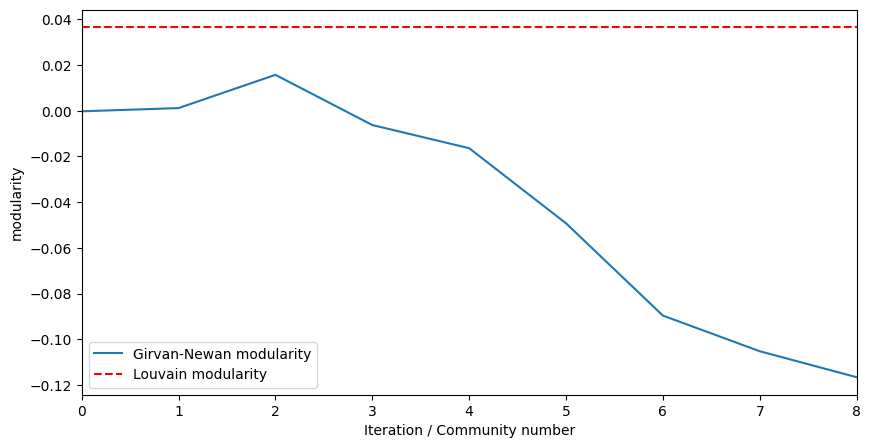

In [23]:
#L-communities modularity
louvain_modularity = nx.community.modularity(interaction_graph, l_communities)


#Plot
plt.figure(figsize=(10,5))
X = range(len(modularities))
plt.plot(X, modularities, label= 'Girvan-Newan modularity')
plt.plot(X, [louvain_modularity]* len(X), '--r', label = 'Louvain modularity')
plt.xlabel('Iteration / Community number')
plt.legend()
plt.ylabel("modularity")
xmin, xmax, ymin, ymax = plt.axis()
plt.axis([0,len(X) -1, ymin, ymax])
plt.show()

*Note* : The louvain modularity is higher by construction but doesn't allow for singleton. The construction method of Girvan-Newman is more coherent with problem; let's consider the optimal iteration of the Girvan-Newman as the one with highest modularity. If POL2A, POLR2C and POLR2B were really forming a community the iteration 2 of the algorithm would yield such result and the maximum modularity would be the louvain modularity.

In [24]:
iteration_index = np.argmax(modularities)
communities = communities_memory[iteration_index]

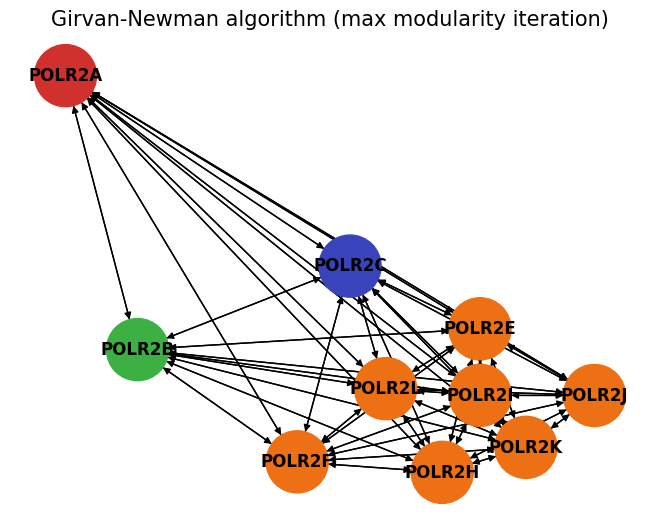

In [25]:
from pbwrap.plot.utils import get_colors_list
color_list = get_colors_list(len(communities), remove_black=True)

for community, color in zip(communities, color_list) :
    for node in community :
        interaction_graph.nodes[node]['color'] = color

color_list = [data[1] for data in interaction_graph.nodes(data='color')]
nx.draw(interaction_graph, node_color = color_list, with_labels=True,font_weight="bold", node_size=2000)
plt.title("Girvan-Newman algorithm (max modularity iteration)", fontdict={"size" : 15})
plt.show()

## Undirected graph

I want to try to use clique theory by converting the weighted multi-dimensional graph to an undirected graph.

### Try 1 : Thresholding with **normalised_colocalisation_count** (**Symetric**)

*Symetric* : nodes are linked if both A -> B and B -> A fullfill threshold.

Let's have a look at the distribution of **normalised_colocalisation_count**.

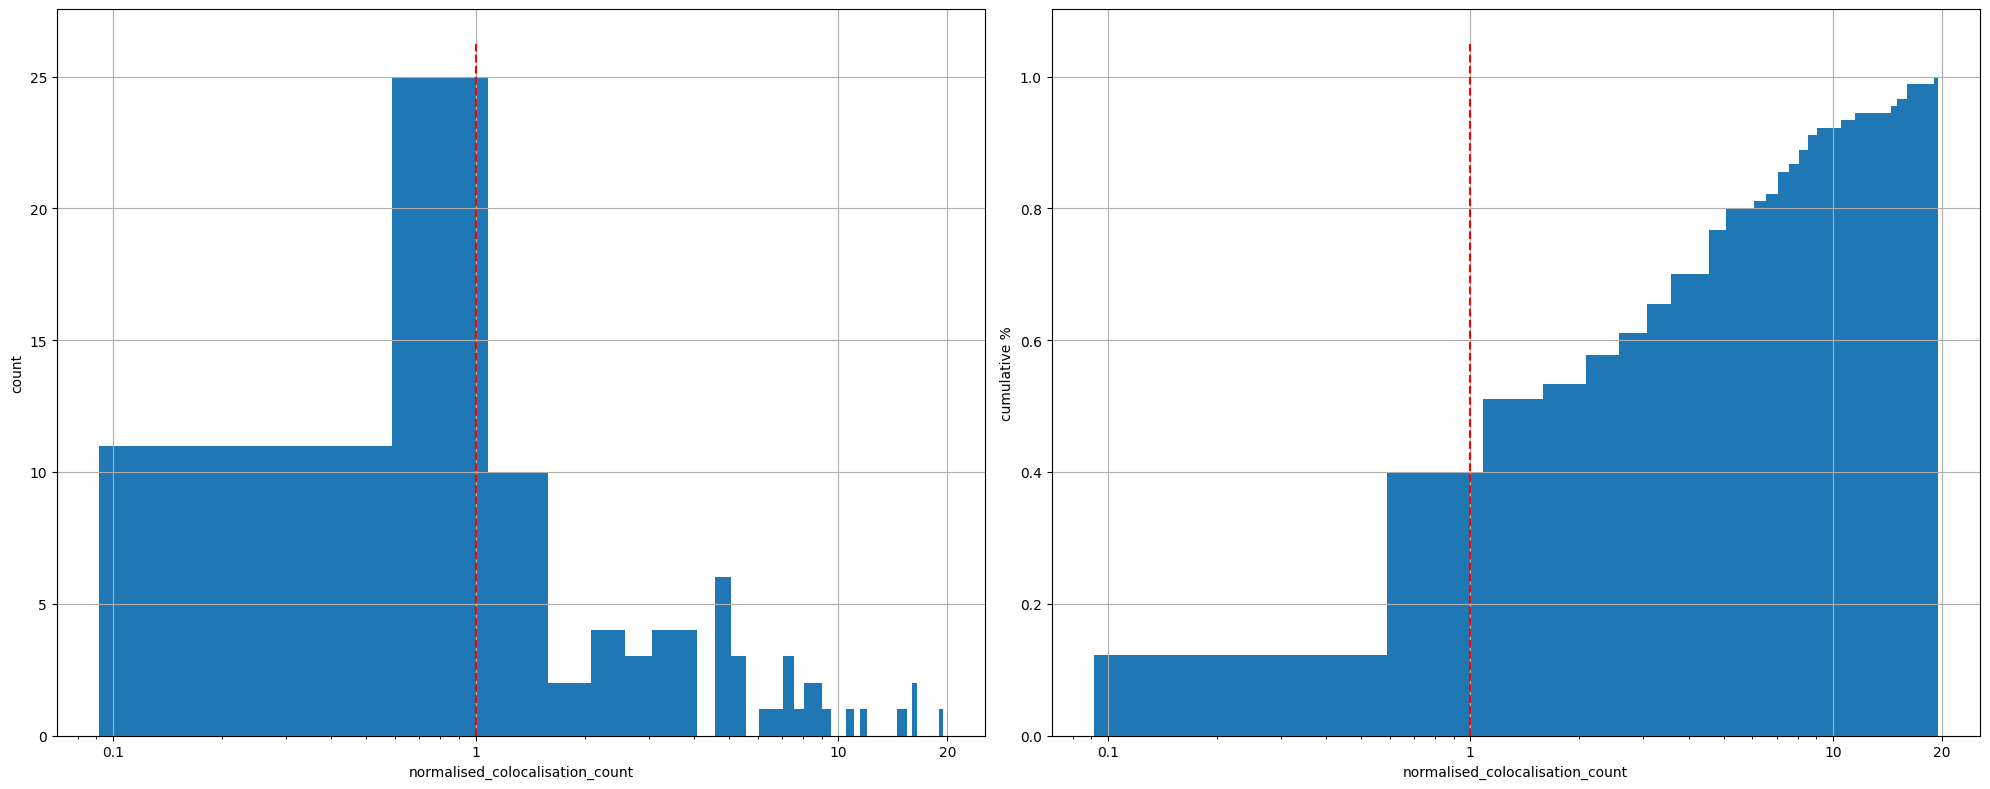

In [26]:
fig, axes = plt.subplots(1,2, figsize= (20,8))
bins = round(2*all_to_clustered_interactions['normalised_colocalisation_count'].max())

#Left
fig.sca(axes[0])
all_to_clustered_interactions['normalised_colocalisation_count'].hist(bins=bins)
plt.ylabel('count')

#Right
fig.sca(axes[1])
all_to_clustered_interactions['normalised_colocalisation_count'].hist(bins=bins, cumulative=True, density=True)
plt.ylabel('cumulative %')


#global
for ax in axes : 
    fig.sca(ax)
    plt.xscale('log')
    plt.xticks([0.1, 1, 10, 20], [0.1, 1, 10, 20])
    plt.xlabel('normalised_colocalisation_count')
    xmin,xmax,ymin,ymax = plt.axis()
    plt.plot([1,1],[ymin,ymax], '--r')

plt.tight_layout()
plt.show()

The thresholding at value 1 is interesting because this measure compares the rate of colocalization versus a random distribution of same size, meaning that a distribution : 
* with a value < 1 tends to 'avoid' colocalization (**anticorrelation**)
* with a value ~ 1 shows random colocalization.
* with a value > 1 tends actively colocalize (**correlation**)

*Note* : interestingly 20% of RNA pairs show a value < 1 ...


In [27]:
THRESHOLD = 2

Let's try with a threshold of 2 to avoid passive colocalization.

In [28]:
paired_coloc_df =pd.merge(
    all_to_clustered_interactions,
    all_to_clustered_interactions,
    left_on=('RNA1','RNA2'),
    right_on=('RNA2','RNA1'),
    suffixes=['_left','_right'],
    validate="1:1"
).set_index(['RNA1_left','RNA2_left'],drop=False)

thresholded_index = paired_coloc_df.loc[(paired_coloc_df['normalised_colocalisation_count_left']>=THRESHOLD) & (paired_coloc_df['normalised_colocalisation_count_right']>=THRESHOLD)].index

thresholded_interactions = all_to_clustered_interactions.set_index(['RNA1','RNA2'])
thresholded_interactions = thresholded_interactions.loc[
    thresholded_interactions.index.isin(thresholded_index)
].reset_index(drop=False)

print(f'after threshold len : {len(thresholded_interactions)}')
print(f'index len : {len(thresholded_index)}')
thresholded_interactions

after threshold len : 38
index len : 38


,RNA1,RNA2,colocalisation,global_population_colocalisation,normalised_colocalisation_count,total_spot_number
0,POLR2E,POLR2F,34,1,5.066667,839
1,POLR2E,POLR2H,31,1,5.033333,839
2,POLR2E,POLR2I,23,1,4.026667,839
3,POLR2E,POLR2J,22,1,3.706667,839
4,POLR2E,POLR2K,18,1,3.160000,839
5,POLR2E,POLR2L,32,1,5.253333,839
6,POLR2F,POLR2E,17,1,2.470085,1137
7,POLR2F,POLR2H,21,1,3.324786,1137
8,POLR2F,POLR2I,14,1,2.393162,1137
9,POLR2F,POLR2L,17,1,2.427350,1137


In [29]:
undirected_G = nx.Graph()
undirected_G.add_nodes_from(RNAs)
undirected_G.add_edges_from(list(thresholded_interactions.loc[:, ['RNA1','RNA2']].itertuples(index=False, name=None)))

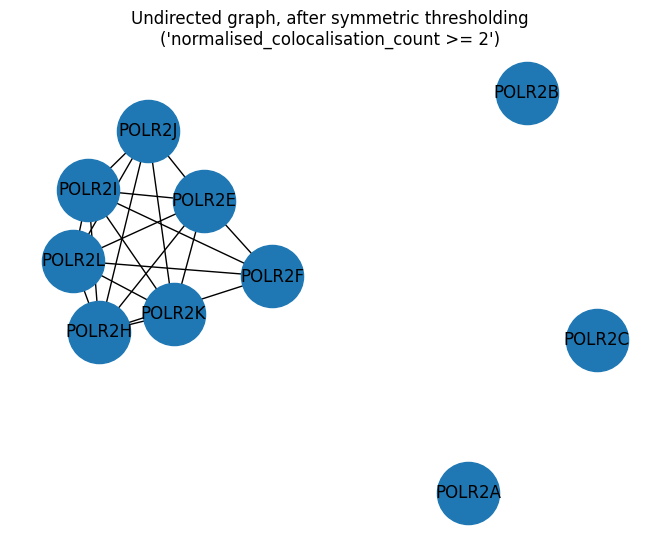

In [30]:
pos = nx.spring_layout(undirected_G, k=3, seed=13, iterations=100)
nx.draw(undirected_G, pos, with_labels=True, node_size = 2000)
plt.margins(0.1)
plt.title(f"Undirected graph, after symmetric thresholding\n('normalised_colocalisation_count >= {THRESHOLD}')")
plt.show()

In [31]:
cliques = list(nx.find_cliques(undirected_G))
for i, clique in enumerate(cliques) :
    print(f"clique {i} : {clique}")

clique 0 : ['POLR2H', 'POLR2E', 'POLR2L', 'POLR2I', 'POLR2F']
clique 1 : ['POLR2H', 'POLR2E', 'POLR2L', 'POLR2I', 'POLR2J', 'POLR2K']
clique 2 : ['POLR2C']
clique 3 : ['POLR2B']
clique 4 : ['POLR2A']


We ignore clique of size 1 or 2 that are uninteresting.

In [32]:
cliques = [clique for clique in cliques if len(clique) > 2]
cliques

[['POLR2H', 'POLR2E', 'POLR2L', 'POLR2I', 'POLR2F'],
 ['POLR2H', 'POLR2E', 'POLR2L', 'POLR2I', 'POLR2J', 'POLR2K']]

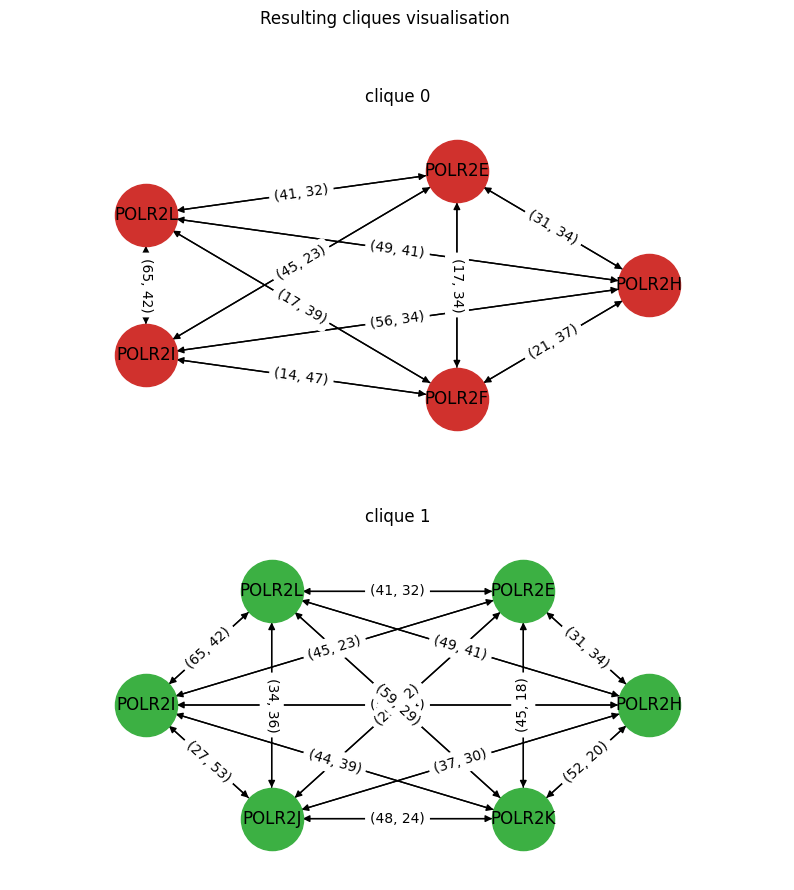

In [33]:
clique_number = len(cliques)
color_list = get_colors_list(clique_number, remove_black=True)
fig, axes_list = plt.subplots(clique_number, figsize=(10,5*clique_number))

for i, clique in enumerate(cliques) :
    ax: plt.Axes = axes_list[i]
    fig.sca(ax)
    ax.set_title(f"clique {i}")
    G = nx.complete_graph(clique, create_using=nx.DiGraph)

    pos = nx.circular_layout(G)

    for edge in G.edges :
        pair = tuple(paired_coloc_df.loc[edge, ['colocalisation_left', 'colocalisation_right']])
        G.edges[edge]['colocalisation'] = pair

    plt.margins(0.2)
    nx.draw(G,pos=pos, with_labels=True, node_size=2000, node_color=color_list[i])
    edge_labels = nx.get_edge_attributes(G, "colocalisation")
    nx.draw_networkx_edge_labels(G, pos=pos, verticalalignment="center", edge_labels=edge_labels)
plt.suptitle("Resulting cliques visualisation")
plt.show()

# *Note* 

1. Singletons from communities are never in cliques
2. All individual in clique are also in the community found above
3. We could define a core clique where all nodes inside core belongs to all cliques

# 3. Conditional colocalization

Ideas : 

* When a clique member is present, how likely is it that 1, 2, 3 ... all members of the clique are present ?
* When a clique member is present, how likely is it that members outside clique are present ?
* How about when a clique member is not with is clique fellows, how likely is it that outside units are presents ?

## Select populations

In [34]:
#Choose from ['all', 'clustered', 'free']
POPULATION1 = "clustered"
POPULATION2 = "all"

In [35]:
try :
    coloc,
except NameError :
    coloc = pd.read_feather(RUN_PATH + "/result_tables/Colocalisation.feather")

if 'colocalisation_distance' in coloc.columns :
    colocalisation_distance = coloc['colocalisation_distance'].unique()
    assert len(colocalisation_distance) == 1, f"{colocalisation_distance}"
    colocalisation_distance = colocalisation_distance[0]

else :
    from Sequential_Fish.pipeline_parameters import COLOC_DISTANCE as colocalisation_distance
    print(f"colocalisation distance set to {colocalisation_distance} nanometers, check that this value is accurate in parameter file.")

colocalisation distance set to 300 nanometers, check that this value is accurate in parameter file.


## Data preparation

### Import

In [36]:
Spots = pd.read_feather(RUN_PATH + "/result_tables/Spots.feather")
Cell = pd.read_feather(RUN_PATH + "/result_tables/Cell.feather")

all_Spots = pd.merge(
    Spots,
    detection.loc[:,['detection_id', 'location', 'RNA', 'voxel_size']],
    on='detection_id',
    validate='m:1'
)
all_Spots = all_Spots.drop(all_Spots[all_Spots['RNA'] == 'Washout'].index)

print(f"{len(Spots)-len(all_Spots)} spots from washout dropped, remaining {len(all_Spots)}.")
all_Spots


2149 spots from washout dropped, remaining 526149.


,spot_id,cluster_id,intensity,population,detection_id,acquisition_id,drift_z,drift_y,drift_x,z_shape,...,x_shape,drifted_z,drifted_y,drifted_x,z,y,x,location,RNA,voxel_size
0,0,NaN,6764,free,1,0,0,0,0,51,...,2004,0,14,469,0,14,469,Location-01,POLR2A,"[200, 97, 97]"
1,1,NaN,7174,free,1,0,0,0,0,51,...,2004,0,46,401,0,46,401,Location-01,POLR2A,"[200, 97, 97]"
2,2,NaN,6994,free,1,0,0,0,0,51,...,2004,0,48,1072,0,48,1072,Location-01,POLR2A,"[200, 97, 97]"
3,3,NaN,7919,free,1,0,0,0,0,51,...,2004,0,106,1101,0,106,1101,Location-01,POLR2A,"[200, 97, 97]"
4,4,NaN,7495,free,1,0,0,0,0,51,...,2004,0,130,1058,0,130,1058,Location-01,POLR2A,"[200, 97, 97]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
528288,528288,NaN,4722,free,208,189,0,0,0,61,...,2004,46,751,375,46,751,375,Location-10,POLR2L,"[200, 97, 97]"
528289,528289,NaN,4277,free,208,189,0,0,0,61,...,2004,46,932,673,46,932,673,Location-10,POLR2L,"[200, 97, 97]"
528290,528290,NaN,4407,free,208,189,0,0,0,61,...,2004,47,1448,848,47,1448,848,Location-10,POLR2L,"[200, 97, 97]"
528291,528291,NaN,3599,free,208,189,0,0,0,61,...,2004,47,1048,1822,47,1048,1822,Location-10,POLR2L,"[200, 97, 97]"


### Preparing NearestNeighbor models

In [37]:
def get_population_index(Spots : pd.DataFrame, population_key:str) :
    if population_key == 'all' : population_index = Spots.index
    elif population_key == 'clustered' : population_index = Spots.loc[~Spots['cluster_id'].isna()].index
    elif population_key == 'free' : population_index = Spots.loc[Spots['cluster_id'].isna()].index
    else : raise AssertionError("{} incorect key for population_key".format(population_key))

    return population_index

In [38]:
def create_coordinate_df(Spots : pd.DataFrame, population_key:str) :
    
    population_index = get_population_index(Spots, population_key)
    coordinates_df = Spots.loc[population_index]

    #converting pixel coordinates to nanometers
    coordinates_df['voxel_size_z'], coordinates_df['voxel_size_y'], coordinates_df['voxel_size_x'] = list(zip(*coordinates_df['voxel_size']))
    coordinates_df['z'] *= coordinates_df['voxel_size_z'] 
    coordinates_df['y'] *= coordinates_df['voxel_size_y'] 
    coordinates_df['x'] *= coordinates_df['voxel_size_x'] 

    coordinates_df['coordinates'] = list(zip(coordinates_df['z'], coordinates_df['y'], coordinates_df['x']))
    coordinates_df = coordinates_df.groupby(['location','RNA'])['coordinates'].apply(list)
    return coordinates_df

In [39]:
population2_coordinates_df = create_coordinate_df(all_Spots, population_key=POPULATION2)

In [40]:
from sklearn.neighbors import NearestNeighbors
from tqdm import tqdm #loading bar

neighbor_models_dict = dict()
for idx in tqdm(population2_coordinates_df.index) :
    spot_distribution = population2_coordinates_df.at[idx]
    new_model = NearestNeighbors(radius=colocalisation_distance)
    new_model.fit(spot_distribution)
    neighbor_models_dict[idx] = new_model

100%|██████████████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 539.42it/s]


### Creating truth table for all colocalisations

In [41]:
population1_index = get_population_index(all_Spots, population_key=POPULATION1)
RNAs = list(population2_coordinates_df.index.get_level_values(1).unique())
colocalisation_truth_df = pd.DataFrame(index=population1_index, columns= RNAs, dtype=bool)
colocalisation_truth_df = colocalisation_truth_df.join(all_Spots.loc[:,['spot_id','location','RNA', 'z','y','x','voxel_size']])

#converting coordinates to nanometers
colocalisation_truth_df['voxel_size_z'], colocalisation_truth_df['voxel_size_y'], colocalisation_truth_df['voxel_size_x'] = list(zip(*colocalisation_truth_df['voxel_size']))
colocalisation_truth_df['z'] *= colocalisation_truth_df['voxel_size_z'] 
colocalisation_truth_df['y'] *= colocalisation_truth_df['voxel_size_y'] 
colocalisation_truth_df['x'] *= colocalisation_truth_df['voxel_size_x'] 
colocalisation_truth_df['coordinates'] = list(zip(colocalisation_truth_df['z'], colocalisation_truth_df['y'], colocalisation_truth_df['x']))

colocalisation_truth_df = colocalisation_truth_df.drop(columns=['z','y','x','voxel_size','voxel_size_z','voxel_size_y','voxel_size_x'])

In [42]:
for location in colocalisation_truth_df['location'].unique() :
    target_idx = colocalisation_truth_df[colocalisation_truth_df['location'] == location].index
    for rna in RNAs :
        model : NearestNeighbors = neighbor_models_dict[(location, rna)]
        coordinates = list(colocalisation_truth_df.loc[target_idx]['coordinates'].apply(np.array,dtype=int))
        coordinates = np.array(coordinates, dtype=int)
        query = model.radius_neighbors(coordinates, return_distance=False)
        query = pd.Series(query, index=target_idx).apply(len).apply(bool) #if count is 0 no colocalisation -> False else True
        colocalisation_truth_df.loc[target_idx,[rna]] = query

In [43]:
colocalisation_truth_df

,POLR2A,POLR2B,POLR2C,POLR2E,POLR2F,POLR2H,POLR2I,POLR2J,POLR2K,POLR2L,spot_id,location,RNA,coordinates
985,True,False,False,False,False,False,False,False,False,False,985,Location-01,POLR2A,"(5400, 42971, 48597)"
1890,True,False,False,True,False,False,False,False,False,True,1890,Location-01,POLR2A,"(0, 5917, 146276)"
1891,True,False,False,True,False,True,False,False,False,True,1891,Location-01,POLR2A,"(0, 5820, 146276)"
1892,True,False,False,True,False,False,False,False,False,True,1892,Location-01,POLR2A,"(200, 5917, 146179)"
1893,True,False,False,True,False,False,False,False,False,True,1893,Location-01,POLR2A,"(0, 5917, 146373)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
527821,False,False,False,False,False,False,False,False,False,True,527821,Location-10,POLR2L,"(3200, 9409, 180420)"
527822,False,False,False,False,False,False,False,False,False,True,527822,Location-10,POLR2L,"(3600, 9506, 180323)"
527824,False,False,False,False,False,False,False,False,False,True,527824,Location-10,POLR2L,"(3800, 9603, 180226)"
527825,False,False,False,False,False,False,False,False,False,True,527825,Location-10,POLR2L,"(3000, 9409, 180420)"


In [44]:
Cell = pd.read_feather(RUN_PATH + "/result_tables/Cell.feather")
Cell.groupby(['location', 'cell_id', 'detection_id'])['colocalisation_id'].first()

location     cell_id  detection_id
Location-01  0        1                  0
                      2                  1
                      3                  2
                      4                  3
                      5                  4
                                      ... 
Location-10  316      206             6652
                      207             6653
                      208             6654
                      209             6655
                      210             6656
Name: colocalisation_id, Length: 6657, dtype: int64